# DATA PREPROCESSING ON IMBALANCED DATASET

**IMPORTING LIBRARIES**

In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import seaborn as sns

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [538]:
import plotly.express          as ex
import plotly.graph_objs       as go
import time
from sklearn.naive_bayes import GaussianNB

**READING AND DISPLAYING THE DATASET**

In [539]:
data=pd.read_csv('../input/water-potability/water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**CHECKING FOR NULL VALUES**

In [541]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [542]:
for col in data.columns:
    p=(data[col].isnull().sum()/len(data))*100
    print('the column {0} have {1} percent of NAN values'.format(col,p.round(2)))
    print()

the column ph have 14.99 percent of NAN values

the column Hardness have 0.0 percent of NAN values

the column Solids have 0.0 percent of NAN values

the column Chloramines have 0.0 percent of NAN values

the column Sulfate have 23.84 percent of NAN values

the column Conductivity have 0.0 percent of NAN values

the column Organic_carbon have 0.0 percent of NAN values

the column Trihalomethanes have 4.95 percent of NAN values

the column Turbidity have 0.0 percent of NAN values

the column Potability have 0.0 percent of NAN values



**STATISTICAL IMPUTATION USING MEDIANS**

In [543]:
data["ph"].fillna(value = data["ph"].median(), inplace = True)
data["Sulfate"].fillna(value = data["Sulfate"].median(), inplace = True)
data["Trihalomethanes"].fillna(value = data["Trihalomethanes"].median(), inplace = True)

**CHECKING FOR PRESENCE OF NULL VALUES AGAIN**

In [544]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [545]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


X = data.drop(['Potability'], axis=1)
y = data['Potability']

X__train, X__test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()
accuracy_scores = []

for train_index, test_index in kfold.split(X):
  X__train, X__test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = scaler.fit_transform(X__train)
X_test = scaler.transform(X__test)

**CHECKING WHETHER THE DATASET IS BALANCED**

Text(0.5, 1.0, 'Comparison between Class 0 and Class 1 on Dataset')

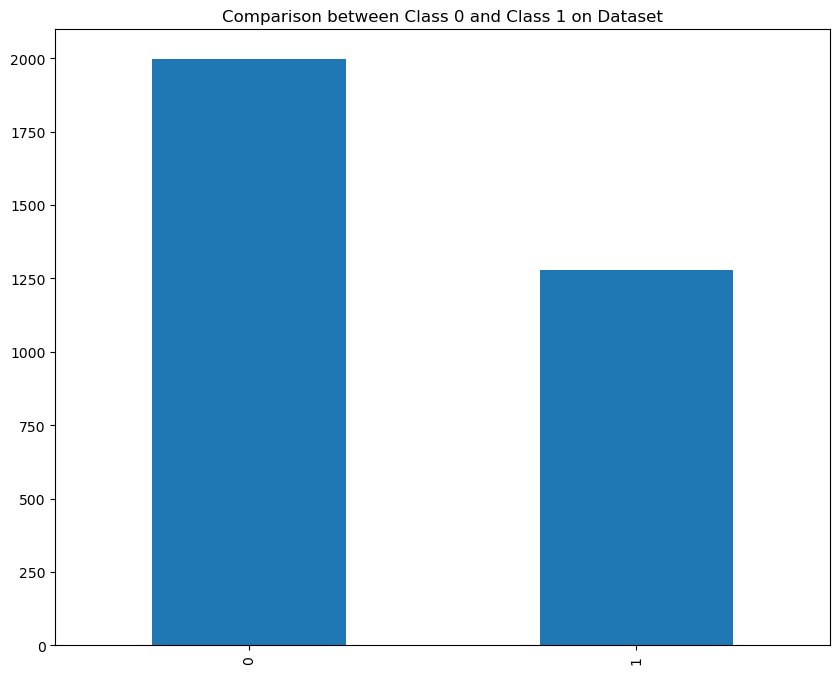

In [547]:
indpie = data['Potability'].value_counts()
indpie.plot(kind='bar',figsize=(10,8))
plt.title("Comparison between Class 0 and Class 1 on Dataset")

**OVERSAMPLING USING SMOTE TO BALANCE THE DATASET**

In [548]:
from imblearn.over_sampling import SMOTE

In [549]:
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Amount of Data before Balancing:", len(data))
print("Amount of Data after Balancing:", len(X_balanced))

Amount of Data before Balancing: 3276
Amount of Data after Balancing: 3996


In [550]:
data_balanced = pd.concat([X_balanced, y_balanced], axis=1)
data_balanced.to_csv('file_balanced.csv', index=False)

#  Balanced Dataset

In [551]:
balanced = pd.read_csv("/kaggle/working/file_balanced.csv")
balanced

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3991,4.859330,173.536114,23855.161972,7.856088,351.434742,515.460735,13.832451,68.270109,3.397633,1
3992,6.760219,199.871850,21050.161489,6.727634,331.009532,628.016828,15.437986,63.496615,4.370357,1
3993,4.324137,159.242313,16955.968867,8.000182,401.416554,309.088826,15.202855,54.706319,4.402602,1
3994,8.031876,237.001280,31119.386409,5.086585,290.529849,416.148528,15.442901,59.470628,4.546018,1


**DOUBLE-CHECKING THE PRESENCE OF NULL VALUES**

In [552]:
balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3996 non-null   float64
 1   Hardness         3996 non-null   float64
 2   Solids           3996 non-null   float64
 3   Chloramines      3996 non-null   float64
 4   Sulfate          3996 non-null   float64
 5   Conductivity     3996 non-null   float64
 6   Organic_carbon   3996 non-null   float64
 7   Trihalomethanes  3996 non-null   float64
 8   Turbidity        3996 non-null   float64
 9   Potability       3996 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 312.3 KB


In [553]:
balanced.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [554]:
balanced['Potability'].unique()

array([0, 1])

In [555]:
X = balanced.drop(['Potability'], axis=1)
y = balanced['Potability']
X__train, X__test_, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()
accuracy_scores = []

for train_index, test_index in kfold.split(X):
  X__train, X__test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train = scaler.fit_transform(X__train)
X_test = scaler.transform(X__test)

# BALANCED DATASET VISUALIZATION

**HEATMAP**

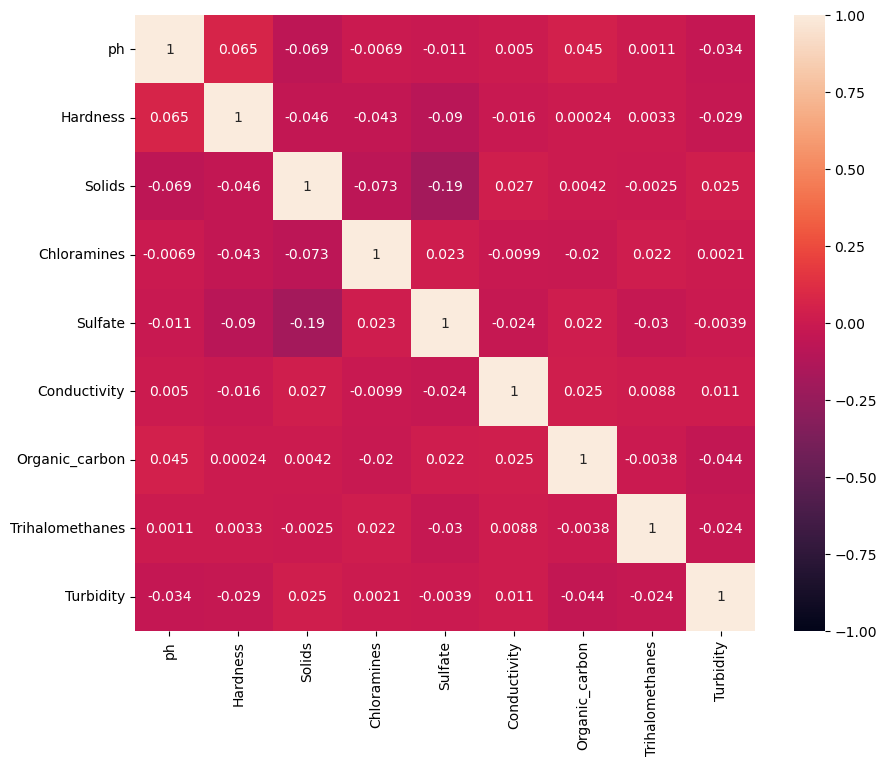

In [556]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train_.corr(),annot=True,vmin=-1)
plt.show()

**POTABILITY DISTRIBUTION COMPARISON**

In [557]:
T = balanced.copy()
T.Potability =  T.Potability.map({1:'Potable',0:'Not Potable'})
ex.pie(T,names='Potability',title='Distribution of Target Labels (Potability)')

**DATASET PAIRPLOT**

<Figure size 1800x1500 with 0 Axes>

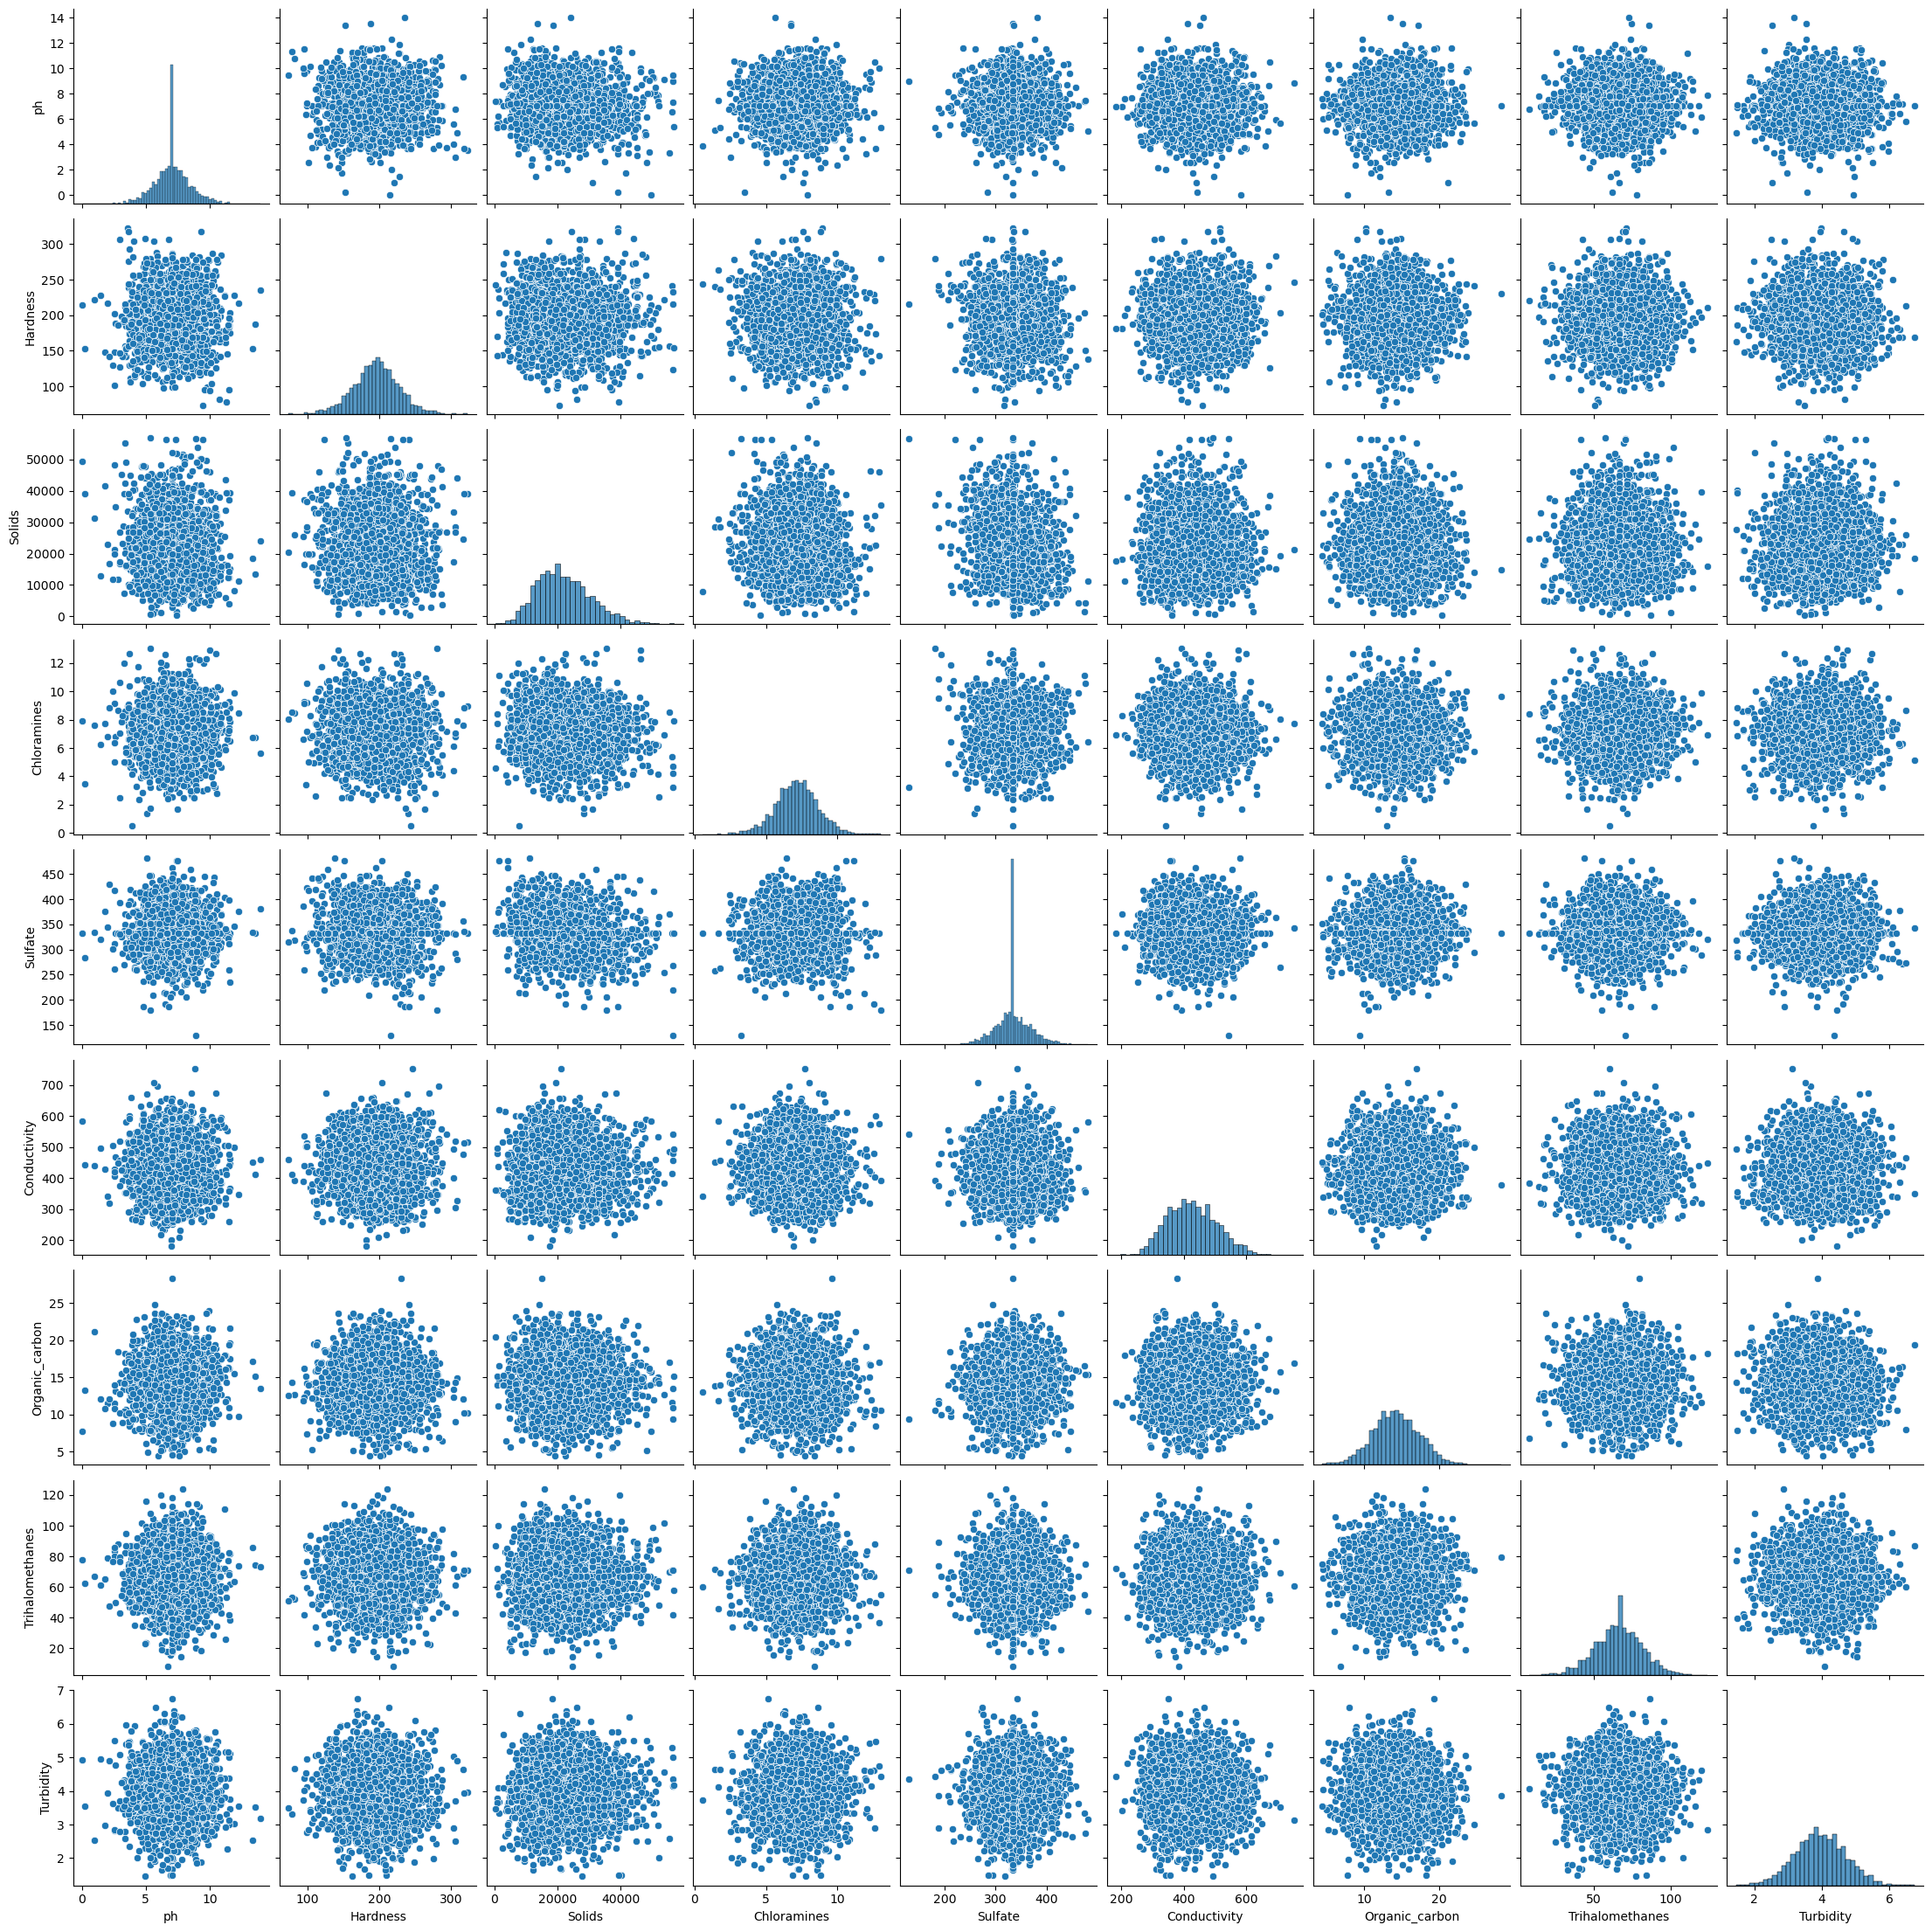

In [558]:
plt.figure(figsize=(18,15))
sns.pairplot(X_train_)
plt.show()

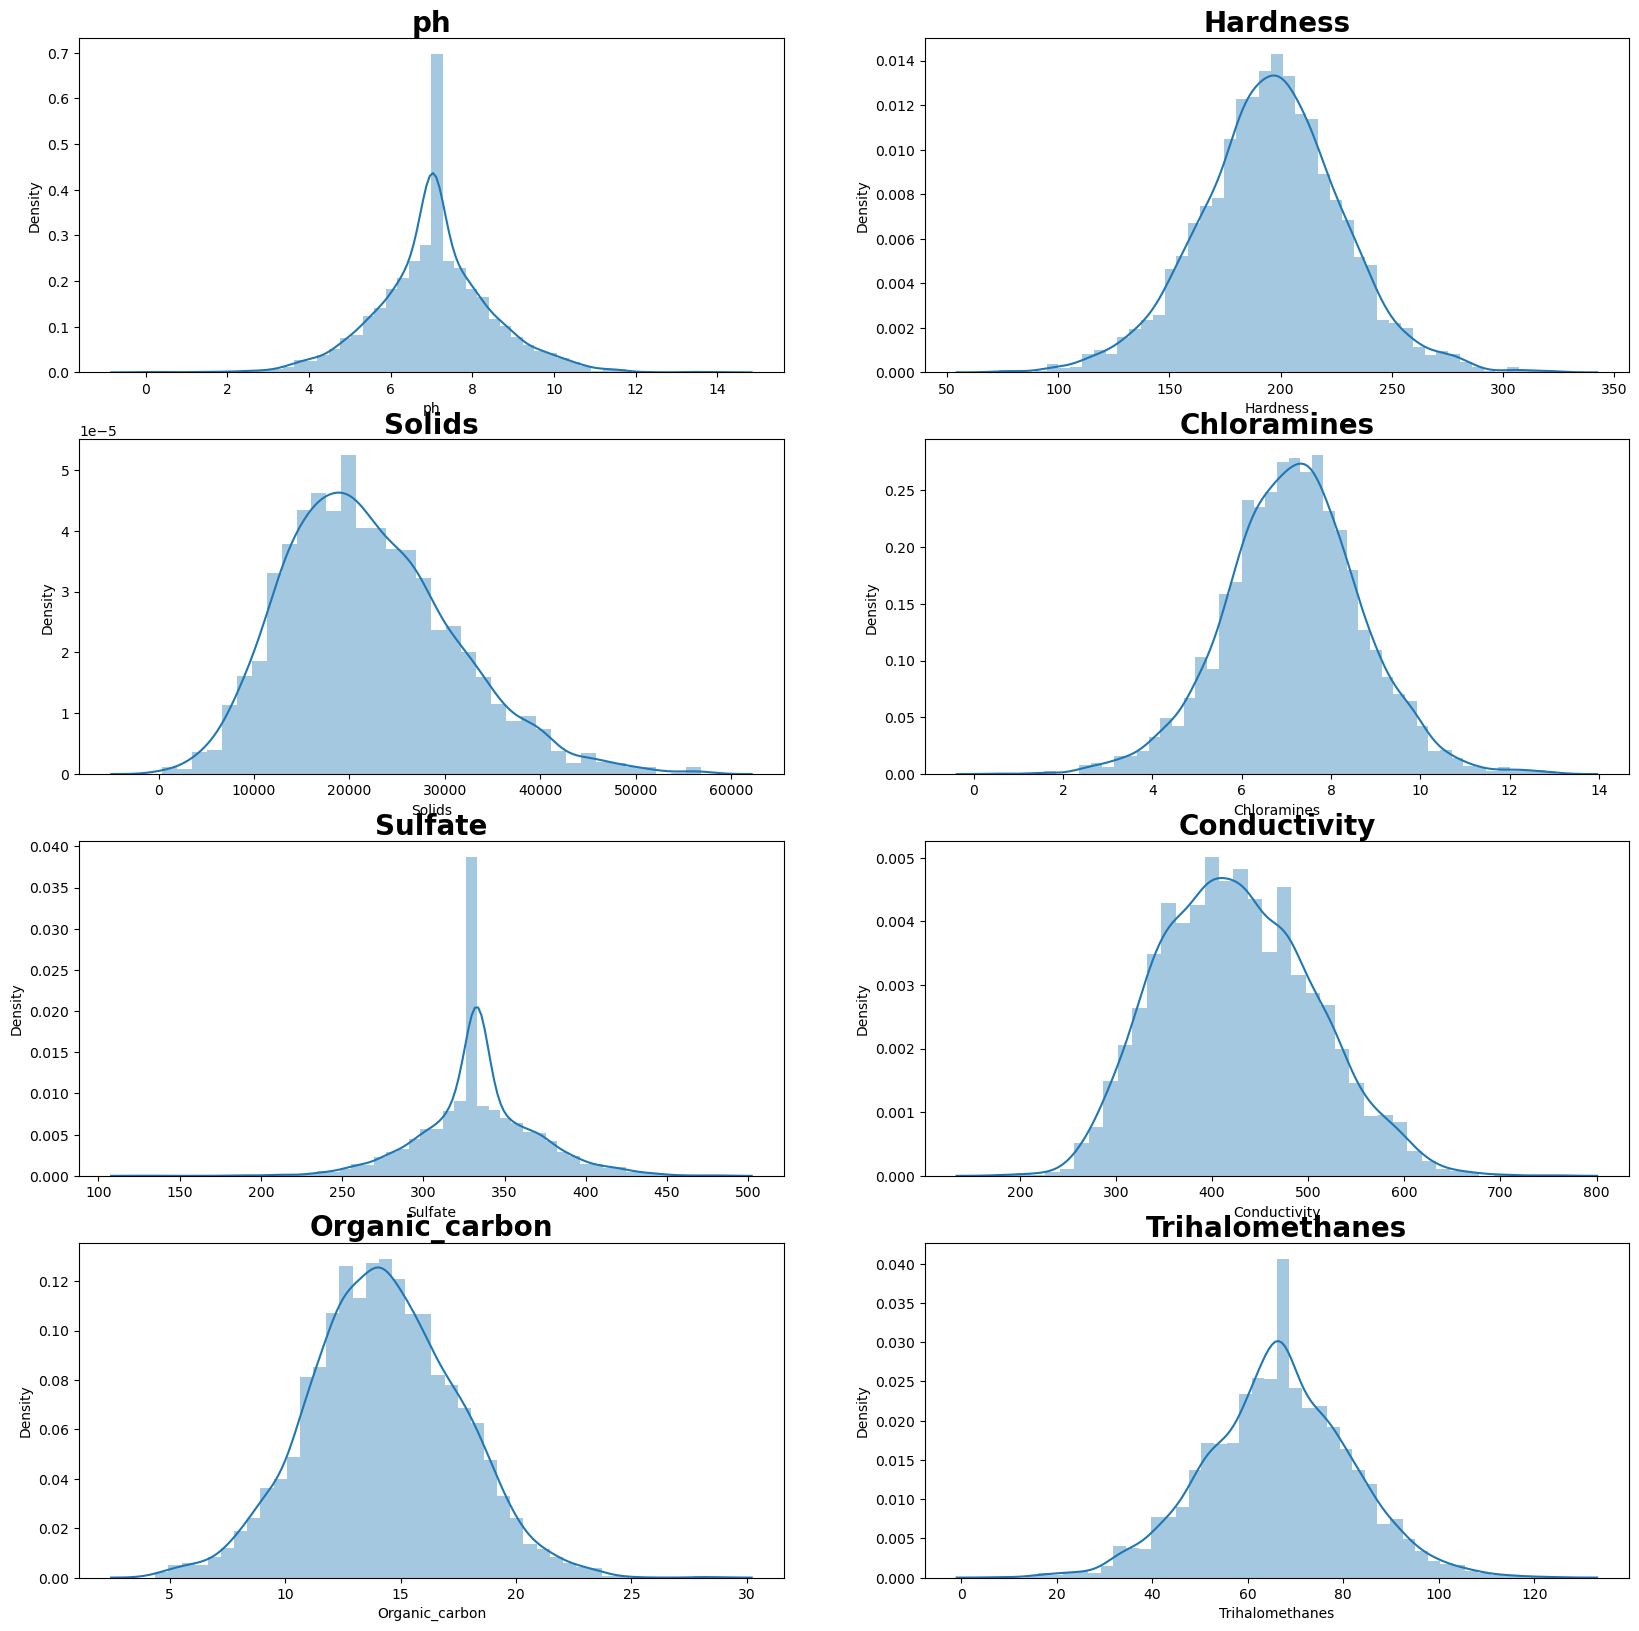

In [559]:
plt.figure(figsize=(20,20))
for i in range(8):
    plt.subplot(4,2,(i%8)+1)
    sns.distplot(X_train_[X_train_.columns[i]])
    plt.title(X_train_.columns[i],fontdict={'size':20,'weight':'bold'},pad=3)
plt.show()

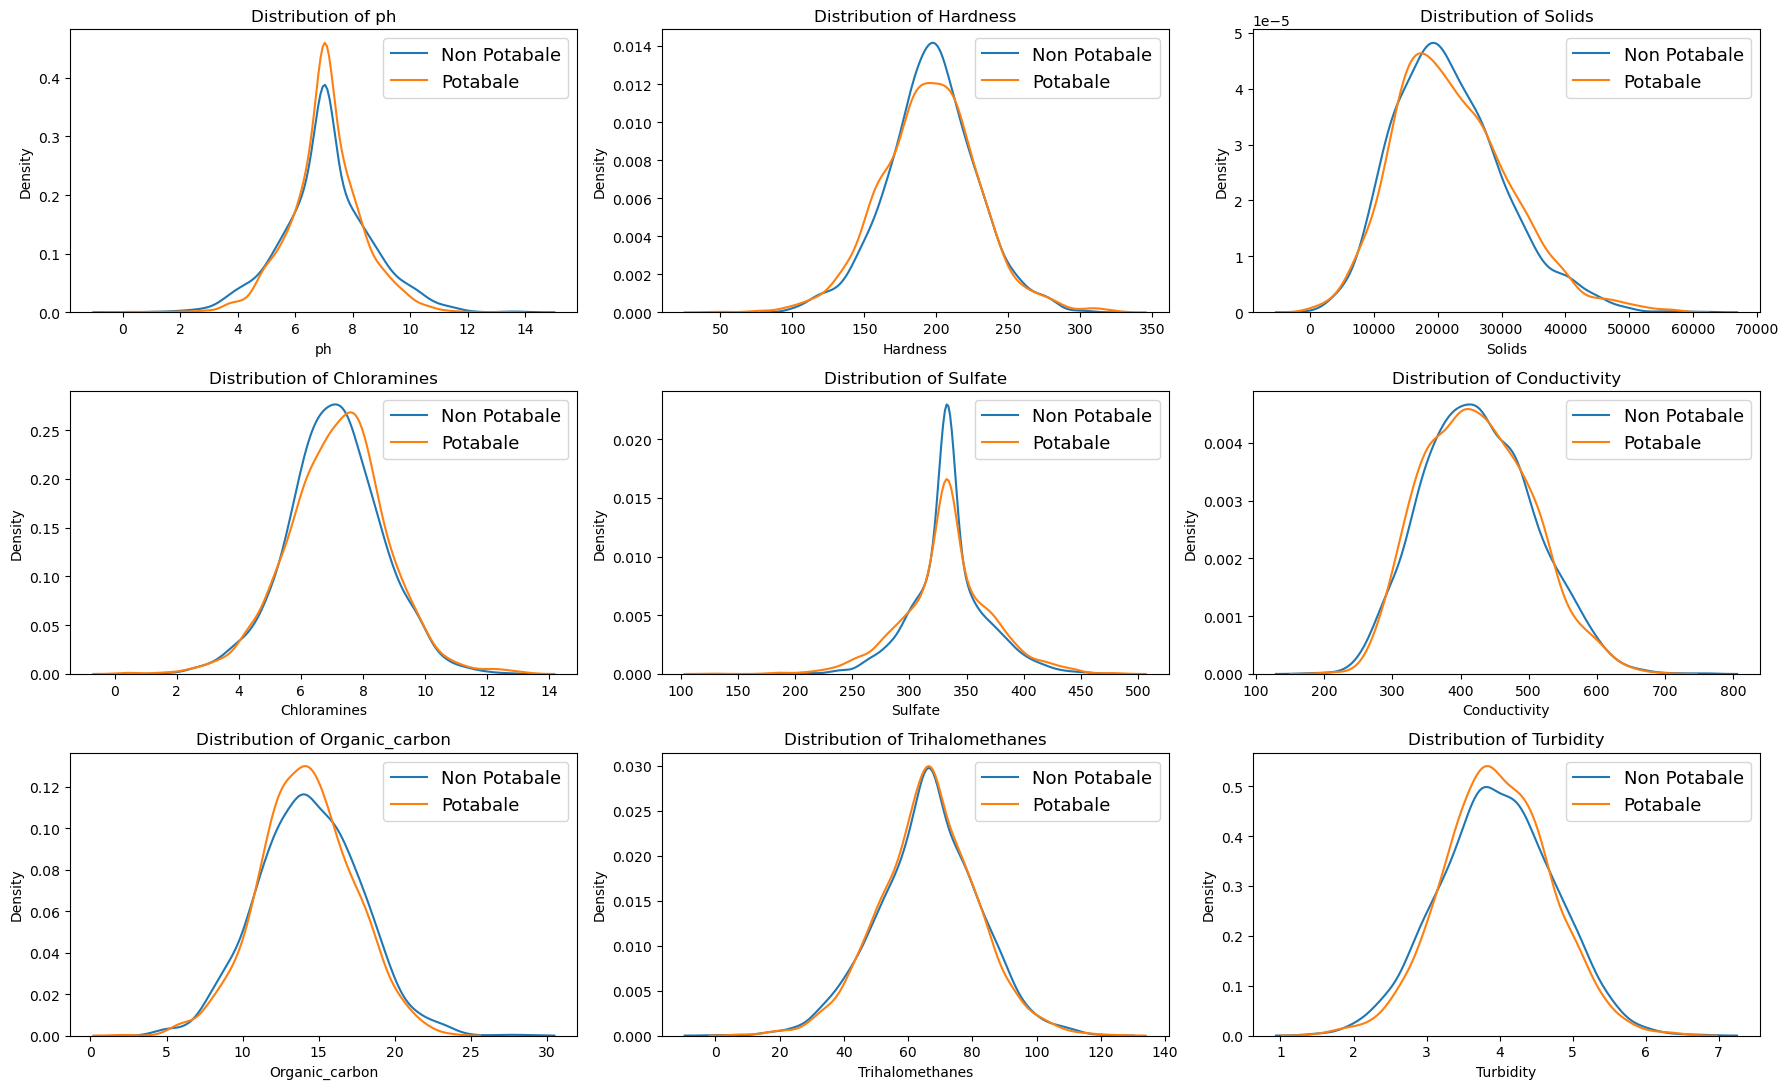

In [560]:
non_potabale = balanced.query('Potability == 0')
potabale     = balanced.query('Potability == 1')

for ax,col in enumerate(balanced.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=non_potabale[col],label='Non Potabale')
    sns.kdeplot(x=potabale[col],label='Potabale')
    plt.legend(prop=dict(size=13))
    
plt.rc('figure',figsize=(18,11))
plt.tight_layout()

# TESTING ACCURACY BEFORE MODELLING

* **ACCURACY WITHOUT K-FOLD APPLICATION**

In [561]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=42)

In [562]:
DTModel_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
ELMModel_clf = MLPClassifier(random_state=42, max_iter=300)

In [563]:

for clf in (DTModel_clf, ELMModel_clf):
    clf.fit(X_train_, y_train_)
    y_pred_ = clf.predict(X_test_)
    print(clf.__class__.__name__, (accuracy_score(y_test_, y_pred_)*100))



DecisionTreeClassifier 57.25
MLPClassifier 49.25


*  **WHEN K-FOLD IS APPLIED**

In [564]:
DT_Model_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
ELM_Model_clf = MLPClassifier(random_state=42, max_iter=300)

In [565]:
for clf in (DT_Model_clf, ELM_Model_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, (accuracy_score(y_test, y_pred)*100))

DecisionTreeClassifier 55.778894472361806
MLPClassifier 69.34673366834171


# BAGGING CLASSIFIER APPLICATION

In [566]:
dtmodel = DecisionTreeClassifier(max_depth=10, random_state=42)
elmmodel = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver= 'adam',random_state=42, max_iter=300)

DTModel = BaggingClassifier(estimator=dtmodel, n_estimators=5, random_state=42)
ELMModel = BaggingClassifier(estimator=elmmodel, n_estimators=5, random_state=42)

In [567]:
print('\033[1;4m' + 'MODELS ACCURACY' + '\033[0m')
DTModel.fit(X_train, y_train)
y_pred_DT = DTModel.predict(X_test)
print('\033[1;4m' + 'DECISION TREE' + '\033[0m', (accuracy_score(y_test, y_pred_DT)*100),"%")

ELMModel.fit(X_train, y_train)
y_pred_ELM = ELMModel.predict(X_test)
print('\033[1;4m' + 'EXTREME LEARNING MACHINE' + '\033[0m',(accuracy_score(y_test, y_pred_ELM)*100), "%")



MODELS ACCURACY
DECISION TREE 62.8140703517588 %
EXTREME LEARNING MACHINE 68.84422110552764 %


# CONFUSION MATRICES

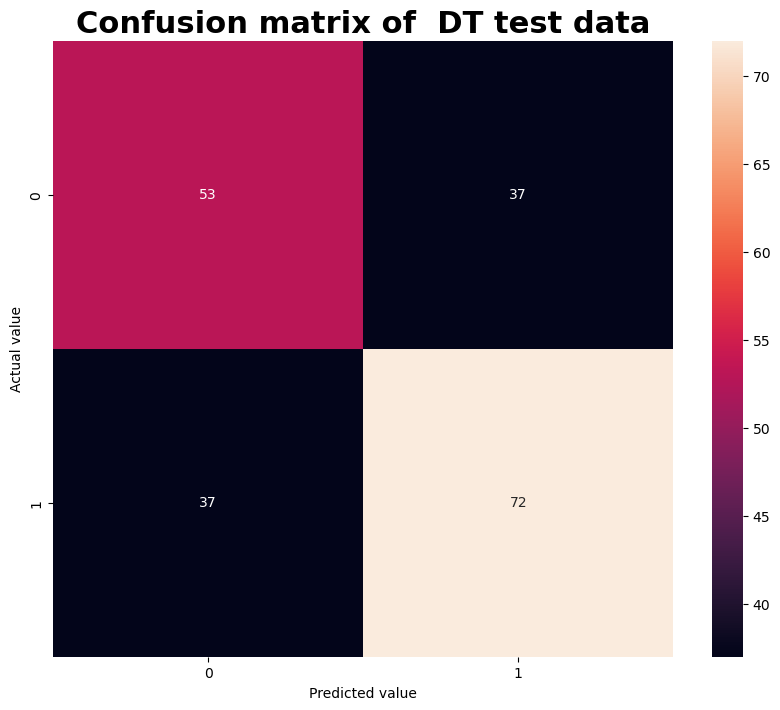

In [568]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_DT),annot=True)
plt.title('Confusion matrix of  DT test data',fontdict={'size':22,'weight':'bold'})
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

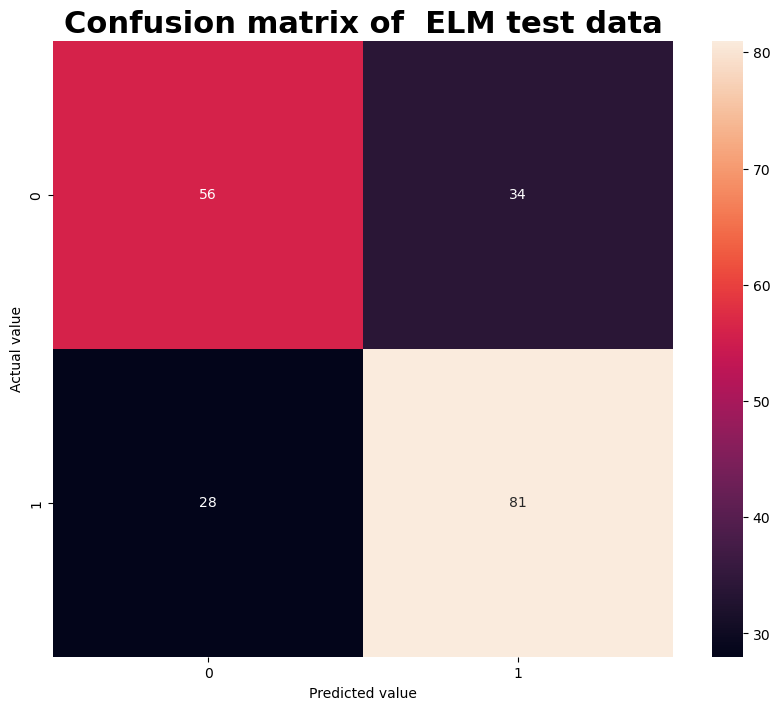

In [569]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_ELM),annot=True)
plt.title('Confusion matrix of  ELM test data',fontdict={'size':22,'weight':'bold'})
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

# MODELS' TRAINING AND TESTING TIME

In [570]:
start_time = time.time()
DTModel.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
DTModel.predict(X_test)
test_time = time.time() - start_time

print('\033[1;4m' + 'Decision Tree Model Training Time:' + '\033[0m', training_time)
print('\033[1;4m' + 'Decision Tree Model Testing Time:' + '\033[0m', test_time)

Decision Tree Model Training Time: 0.15933561325073242
Decision Tree Model Testing Time: 0.0025811195373535156


In [571]:
start_time = time.time()
ELMModel.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
ELMModel.predict(X_test)
classifiertest_time = time.time() - start_time

print('\033[1;4m' + 'Extreme Learning Machine Model Training time:' + '\033[0m', training_time)
print('\033[1;4m' + 'Extreme Learning Machine Model Testing time:' + '\033[0m', test_time)

Extreme Learning Machine Model Training time: 59.669432401657104
Extreme Learning Machine Model Testing time: 0.0025811195373535156


In [582]:
print('\033[1;4m' + 'DECISION TREE MODEL:' + '\033[0m',)
print('\033[1;4m' + 'Accuracy' + '\033[0m', (accuracy_score(y_test, y_pred_DT)*100), "%")
print('\033[1;4m' + 'Precision' + '\033[0m', (precision_score(y_test, y_pred_DT, average= 'weighted')*100), "%")
print('\033[1;4m' + 'Recall:' + '\033[0m', (recall_score(y_test, y_pred_DT, average= 'weighted')*100), "%")
print('\033[1;4m' + 'F1 Score:' + '\033[0m', (f1_score(y_test, y_pred_DT, average= 'weighted')*100), "%")

DECISION TREE MODEL:
Accuracy 62.8140703517588 %
Precision 62.8140703517588 %
Recall: 62.8140703517588 %
F1 Score: 62.8140703517588 %


In [583]:
print('\033[1;4m' + 'EXTREME LEARNING MACHINE MODEL:' + '\033[0m',)
print('\033[1;4m' + 'Accuracy' + '\033[0m', (accuracy_score(y_test, y_pred_ELM)*100), "%")
print('\033[1;4m' + 'Precision' + '\033[0m', (precision_score(y_test, y_pred_ELM, average= 'weighted')*100), "%")
print('\033[1;4m' + 'Recall:' + '\033[0m', (recall_score(y_test, y_pred_ELM, average= 'weighted')*100), "%")
print('\033[1;4m' + 'F1 Score:' + '\033[0m', (f1_score(y_test, y_pred_ELM, average= 'weighted')*100), "%")

EXTREME LEARNING MACHINE MODEL:
Accuracy 68.84422110552764 %
Precision 68.73060956958707 %
Recall: 68.84422110552764 %
F1 Score: 68.72431739980692 %


# MODELS' CLASSIFICATION REPORT

In [574]:

print('               \033[1;4m' + 'DECISION TREE CLASSIFICATION REPORT' + '\033[0m', '\n')
print(classification_report(y_test,y_pred_DT))

               DECISION TREE CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        90
           1       0.66      0.66      0.66       109

    accuracy                           0.63       199
   macro avg       0.62      0.62      0.62       199
weighted avg       0.63      0.63      0.63       199



In [575]:

print(' \033[1;4m' + 'EXTREME LEARNING MACHINE MODEL CLASSIFICATION REPORT' + '\033[0m', '\n')
print(classification_report(y_test,y_pred_ELM))

 EXTREME LEARNING MACHINE MODEL CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        90
           1       0.70      0.74      0.72       109

    accuracy                           0.69       199
   macro avg       0.69      0.68      0.68       199
weighted avg       0.69      0.69      0.69       199

